<a href="https://colab.research.google.com/github/naga-sk/DataScienceTraining-Assignments/blob/main/AIML/fetal_health_NB_and_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score

# Read Data

In [98]:
df = pd.read_csv("https://raw.githubusercontent.com/balaji2v/Inceptez_Batch19/main/fetal_health.csv")

In [99]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# Making Sense of Data



In [100]:
# Analysis of numeric variables - both discrete and continuous

df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


# Preparing Data

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

# Separating Variables from Outcome

In [102]:
vars = df.iloc[:,:-1]

In [103]:
vars.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [104]:
res = df.iloc[:,-1]

In [105]:
res.head()

0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: fetal_health, dtype: float64

# Splitting training and testing datasets

In [106]:
# Input parameters
# vars = variables are the independent variable
# res = result is the dependent variable or the outcome
# test_size = .3 indicates that 30% will be the test volume and 70% will be the train volume
# random_state = arbitrary argument which fixes the random sampling within the input dataset
# Output
# x_train = 70% of the independent variables
# x_test = 30% of the indepenent variables
# y_train = 70% of the outcome
# y_test = 30% of the outcome

x_train, x_test, y_train, y_test = train_test_split(vars, res, test_size=.3, random_state=2, stratify=res)

In [107]:
x_train.shape

(1488, 21)

In [108]:
y_train.value_counts()

1.0    1158
2.0     207
3.0     123
Name: fetal_health, dtype: int64

In [109]:
x_test.shape

(638, 21)

In [110]:
y_test.value_counts()

1.0    497
2.0     88
3.0     53
Name: fetal_health, dtype: int64

# Applying Gaussian Naive Bayes

In [111]:
model = GaussianNB()

In [112]:
# Fit the test data within the Gaussian Naive Bayes 
model.fit(x_train, y_train)

GaussianNB()

In [113]:
y_pred_train = model.predict(x_train)

In [114]:
y_pred_test = model.predict(x_test)

In [115]:
y_pred_test

array([1., 2., 2., 1., 1., 3., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 3., 2., 1., 1., 1.,
       3., 1., 2., 3., 1., 2., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 2.,
       3., 2., 2., 3., 1., 2., 1., 1., 1., 3., 2., 2., 1., 1., 1., 2., 1.,
       2., 2., 2., 1., 1., 3., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 3., 1., 1., 1., 1.,
       2., 2., 1., 2., 2., 1., 3., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1.,
       2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 2., 2., 1., 3., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1.,
       2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 3., 1., 2., 1., 1., 1., 3.,
       1., 1., 2., 2., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 2., 1.,
       1., 2., 3., 2., 2., 1., 3., 1., 1., 2., 1., 1., 1., 1., 1., 2., 3.,
       1., 1., 1., 1., 2.

In [116]:
print(list(y_test))

[1.0, 2.0, 2.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 2.0, 3.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0,

In [117]:
accuracy_score(y_pred_train, y_train)

0.8286290322580645

In [118]:
accuracy_score(y_pred_test, y_test)

0.7836990595611285

In [119]:
confusion_matrix(y_pred_train, y_train)

array([[973,  20,   4],
       [145, 181,  40],
       [ 40,   6,  79]])

In [120]:
confusion_matrix(y_pred_test, y_test)

array([[395,   9,   4],
       [ 83,  75,  19],
       [ 19,   4,  30]])

In [121]:
print(classification_report(y_pred_train, y_train))

              precision    recall  f1-score   support

         1.0       0.84      0.98      0.90       997
         2.0       0.87      0.49      0.63       366
         3.0       0.64      0.63      0.64       125

    accuracy                           0.83      1488
   macro avg       0.79      0.70      0.72      1488
weighted avg       0.83      0.83      0.81      1488



In [122]:
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

         1.0       0.79      0.97      0.87       408
         2.0       0.85      0.42      0.57       177
         3.0       0.57      0.57      0.57        53

    accuracy                           0.78       638
   macro avg       0.74      0.65      0.67       638
weighted avg       0.79      0.78      0.76       638



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


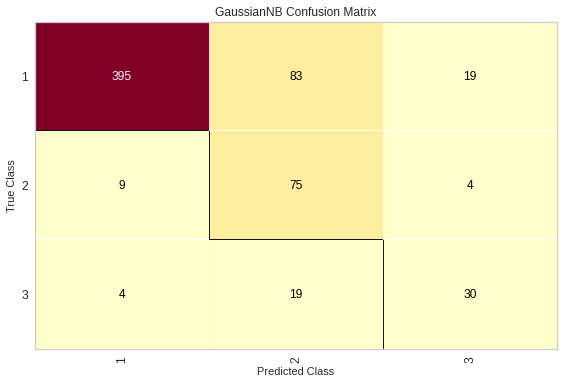

In [123]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(model, classes=['1','2', '3'])
cm.fit(x_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(x_test, y_test)
cm.show()


# Applying K Nearest Neighbor

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [125]:
knn = KNeighborsClassifier()

In [126]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [127]:
y_pred_train = knn.predict(x_train)

In [128]:
y_pred_train

array([1., 1., 1., ..., 1., 2., 1.])

In [129]:
y_pred_test = knn.predict(x_test)

In [130]:
y_pred_test

array([1., 3., 2., 1., 1., 3., 1., 1., 1., 1., 1., 2., 1., 1., 3., 1., 2.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 3., 1., 1., 3., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 3., 2., 1., 1., 1.,
       3., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 3., 2., 1., 1., 1., 2.,
       3., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 3., 1., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 3., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 3., 1., 2., 1., 1., 1., 1.,
       1., 1., 2., 2., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 3., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 3.,
       1., 1., 1., 1., 2.

In [131]:
print(list(y_test))

[1.0, 2.0, 2.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 2.0, 3.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0,

In [132]:
accuracy_score(y_pred_train, y_train)

0.9227150537634409

In [133]:
accuracy_score(y_pred_test, y_test)

0.8949843260188087

In [134]:
precision_score(y_pred_train, y_train, average=None)

array([0.97927461, 0.67149758, 0.81300813])

In [135]:
precision_score(y_pred_test, y_test, average=None)

array([0.95975855, 0.61363636, 0.75471698])

In [136]:
precision_score(y_pred_test, y_test, average='macro')

0.7760372986920953

In [137]:
precision_score(y_pred_test, y_test, average='weighted')

0.9048291561420552

In [138]:
confusion_matrix(y_pred_train, y_train)

array([[1134,   65,   11],
       [  18,  139,   12],
       [   6,    3,  100]])

In [139]:
confusion_matrix(y_pred_test, y_test)

array([[477,  32,   9],
       [ 16,  54,   4],
       [  4,   2,  40]])

In [140]:
print(classification_report(y_pred_train, y_train))

              precision    recall  f1-score   support

         1.0       0.98      0.94      0.96      1210
         2.0       0.67      0.82      0.74       169
         3.0       0.81      0.92      0.86       109

    accuracy                           0.92      1488
   macro avg       0.82      0.89      0.85      1488
weighted avg       0.93      0.92      0.93      1488



In [141]:
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

         1.0       0.96      0.92      0.94       518
         2.0       0.61      0.73      0.67        74
         3.0       0.75      0.87      0.81        46

    accuracy                           0.89       638
   macro avg       0.78      0.84      0.80       638
weighted avg       0.90      0.89      0.90       638



In [142]:
def knn_model(k, X_train, X_test, Y_train, Y_test, weights='uniform', metric='minkowski'):
    # weights: uniform, distance ; metric: minkowski, euclidean, manhattan, cosine
    knn = KNeighborsClassifier(n_neighbors = k, weights=weights, metric=metric)
    print("K :", k)
    print("Weights :", weights)
    print("Metric : ", metric)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    print("\nConfusion Matrix :\n", confusion_matrix(Y_test, Y_pred))
    print("\nAccuracy Score : ", accuracy_score(Y_test, Y_pred))
    print("\nClassification Report :\n", classification_report(Y_test, Y_pred))

In [143]:
for k in range (1, 19, 2) :
  knn_model(k, x_train, x_test, y_train, y_test)

K : 1
Weights : uniform
Metric :  minkowski

Confusion Matrix :
 [[466  25   6]
 [ 25  61   2]
 [  6   5  42]]

Accuracy Score :  0.8918495297805643

Classification Report :
               precision    recall  f1-score   support

         1.0       0.94      0.94      0.94       497
         2.0       0.67      0.69      0.68        88
         3.0       0.84      0.79      0.82        53

    accuracy                           0.89       638
   macro avg       0.82      0.81      0.81       638
weighted avg       0.89      0.89      0.89       638

K : 3
Weights : uniform
Metric :  minkowski

Confusion Matrix :
 [[470  21   6]
 [ 29  57   2]
 [  6   3  44]]

Accuracy Score :  0.8949843260188087

Classification Report :
               precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       497
         2.0       0.70      0.65      0.67        88
         3.0       0.85      0.83      0.84        53

    accuracy                           0.89       6